In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_breuschpagan

#### В качестве данных возьмем данные о последних 30 кинофильмах, получивших «Оскар» как самый лучший фильм.

In [89]:
new_data = pd.read_csv('movies.csv')
new_data.columns = ['Name','Year', 'Rat', 'Length', 'Genre', 'Budget', 'box_office']
new_data = new_data.drop(index=[14, 20, 23])
new_data

,Name,Year,Rat,Length,Genre,Budget,box_office
0,Форма воды,2017,6.914,123,"фантастика, драма",19.4,195.243464
1,Лунный свет,2016,6.151,110,драма,1.5,65.046687
2,В центре внимания,2015,7.489,129,"драма, криминал, история",20.0,88.346473
3,Бёрдмэн,2014,7.604,119,"драма, комедия",18.0,103.215094
4,12 лет рабства,2013,7.710,133,"драма, биография, история",20.0,178.371993
5,Операция «Арго»,2012,7.517,120,"триллер, драма, биография",44.5,232.324128
6,Артист,2011,7.942,96,"драма, мелодрама, комедия",15.0,133.432856
7,Король говорит!,2010,7.977,118,"драма, биография, история",15.0,414.211549
8,Повелитель бури,2008,7.298,126,"триллер, драма, военный, история",15.0,49.230772
9,Миллионер из трущоб,2008,7.724,120,"драма, мелодрама",15.0,377.910544


### Определите, что из полученных данных рассматривается как изучаемый показатель, а что – как объясняющий фактор.

#### В качестве регрессора X возьмем данные о рейтинге, а в качестве регрессанта Y его сборы в млн. долл.. 

In [90]:
Y = np.array(new_data['box_office'])
X = np.array(new_data['Rat'])

### 	Постройте диаграмму рассеяния.

Text(0, 0.5, 'Сборы')

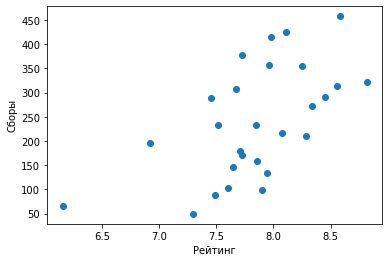

In [91]:
plt.scatter(X,Y)
plt.xlabel('Рейтинг')
plt.ylabel('Сборы')

### 	Постройте парную линейную регрессию и вычислите расчетные значения показателя.

In [92]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1),Y.reshape(-1,1))

LinearRegression()

#### Получим коэф. регрессии:

In [93]:
k = lin_reg.coef_[0][0] 
b = lin_reg.intercept_[0]
print('coef: ', k)
print('intercept: ',  b)

coef:  123.25569192990024
intercept:  -727.9543930698077


### 	На диаграмме рассеяния постройте график ПЛР.

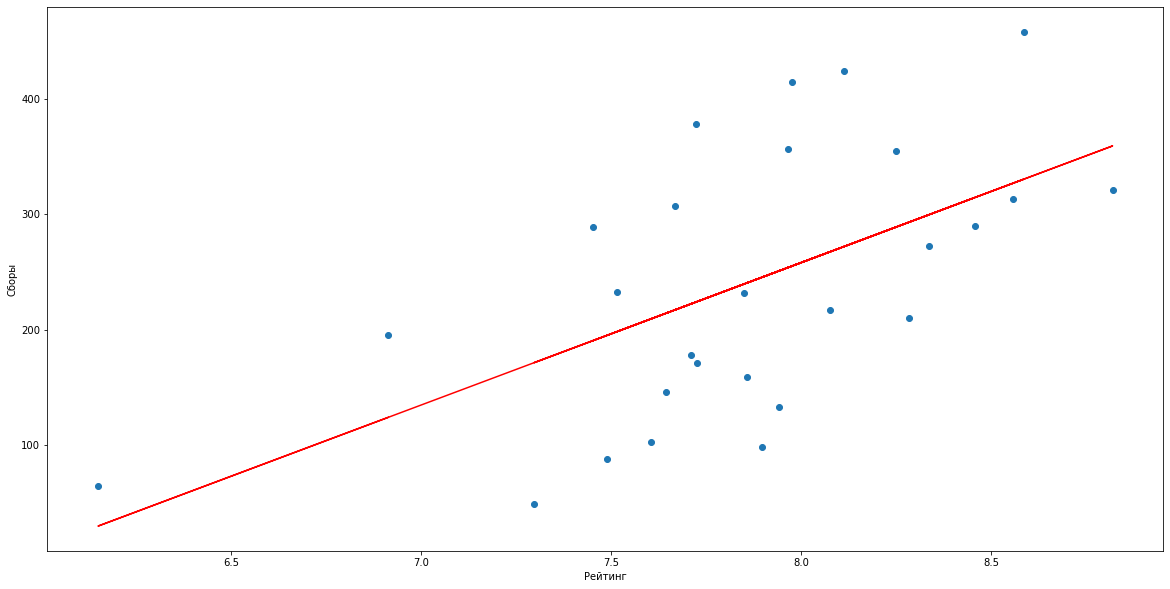

In [140]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Сборы')

plt.scatter(X,Y)
plt.plot(X, [k*x + b for x in X], color = 'r')

### 	Вычислите остатки и постройте их график

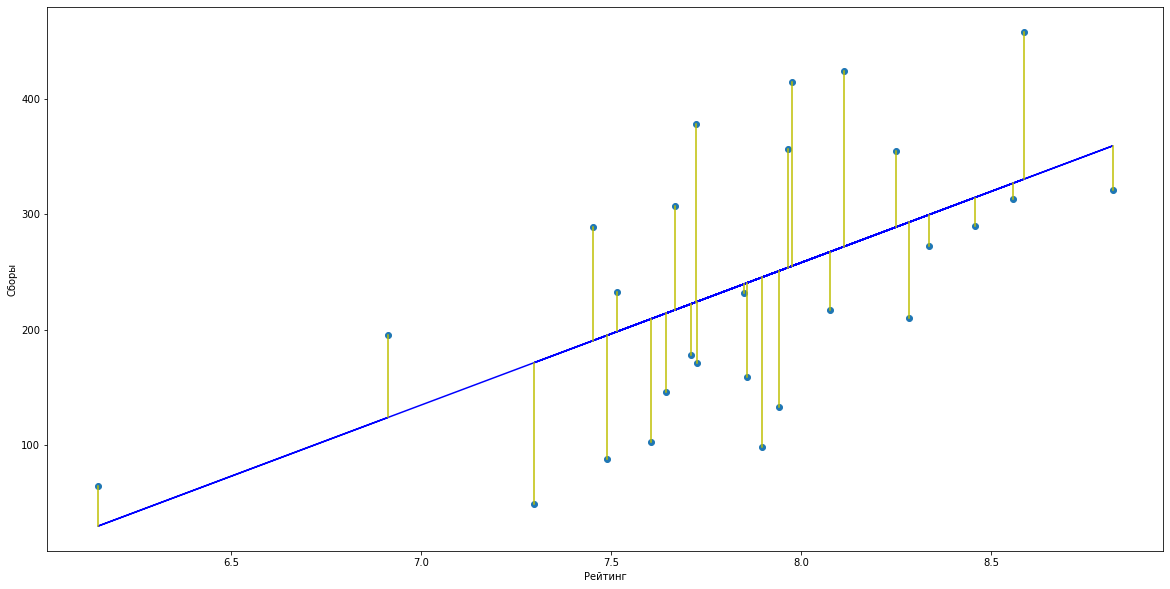

In [114]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Сборы')
plt.scatter(X,Y)
plt.plot(X, [k*x + b for x in X], color = 'b')

for i in range(len(X)):
    true_dots = (X[i], X[i])
    preds = (Y[i], k*X[i] + b)
    plt.plot(true_dots, preds, color = 'y')

### 	Проверьте статистическую значимость полученных значений параметров регрессии с помощью критерия Стьюдента и критерия Фишера.

In [101]:
results = smf.ols('box_office ~ Rat', data = new_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     12.80
Date:                Sun, 10 Jan 2021   Prob (F-statistic):            0.00145
Time:                        22:57:46   Log-Likelihood:                -160.47
No. Observations:                  27   AIC:                             324.9
Df Residuals:                      25   BIC:                             327.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -727.9544    270.991     -2.686      0.013   -1286.071    -169.838
Rat          123.2557     34.456      3.577      0.001      52.292     194.219
==============================================================================
Omnibus:                        4.473   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                1.869
Skew:                           0.275   Prob(JB):                        0.393
Kurtosis:                       1.835   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Критерий Стьюдента
p_value_a = 0.013

**p_value_a < 0.05** => константное значение статестически значимо

p_value_b = 0.001

**p_value_b < 0.05** => переменная стат. значима

### Критерий Фишера
Prob (F-statistic) = 0.00145 < 0.05

То есть данное построенное уравнение ПЛР является статичтически значимым

### 	Вычислите доверительные интервалы параметров ЛР.

Доверительный интервал для a = Intercept = (-1286.071, -169.838) <br>
Доверительный интервал для b = Rat = (52.292, 194.219) <br>
где alpha = 0.05, то есть уровень доверия 95%

#### Построим точечный прогноз значения Y для фиксированного X. Вычислим стандартную ошибку и доверительный интервал полученного прогноза

In [141]:
X2 = sm.add_constant(X.reshape(-1,1))
est2.get_prediction(X2[0]).summary_frame()[['mean', 'mean_se','mean_ci_lower','mean_ci_upper']]

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,124.235461,37.0532,47.922967,200.547955


mean - точечный прогноз значения Y = 124.235461

mean_se - стандартная ошибка = 37.0532

доверительный интервал:<br>
Нижняя граница - mean_ci_lower = 47.922967 <br>
Верхняя граница - mean_ci_upper = 200.547955

### Проверьте гипотезу о гомоскедастичности наблюдений по методу Гольдфельда-Квандта 

In [118]:
t = Y -  [k*x + b for x in X]

In [139]:
homo = het_goldfeldquandt(t.reshape((-1,1)), X.reshape((-1,1)), alternative = 'increasing')
print(f'F-statistic: {homo[0]} \np-value: {homo[1]}')

F-statistic: 0.6476518122961875 
p-value: 0.7702007602695633


поскольку p_value = 0.7702007602695633 > 0.05 => остатки гетероскедостичны